In [29]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import *



In [30]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
closure  = False
groomed = True

In [32]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'


In [33]:
with open('latest_pkl/pythia_syst_0302.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_all.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_1701.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk.pkl', "rb") as f:
    output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']

In [34]:
resp_matrix_4d

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  Variable([200, 260, 350, 460, 13000], name='ptgen', label='$p_{T,GEN}$ (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 200, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp', 'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp', 'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 'JERUp', 'JERDown', 'hem', 

In [35]:

# reco_mass = 151
# gen_mass = 141



# resp_matrix_4d = resp_matrix_4d[:, :, :hist.loc(reco_mass), :, :hist.loc(gen_mass), :]
# input_data = input_data[:,  :, :hist.loc(reco_mass), ...]
# fakes = fakes[:,  :, :hist.loc(reco_mass), ...]
# misses = misses[:,  :, :hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :, :hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, :hist.loc(reco_mass), :,: hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :, :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :, :hist.loc(gen_mass), ...]
















from cycler import cycler

# Set tab20 as the default color cycle
tab20_colors = plt.cm.tab20.colors
plt.rcParams['axes.prop_cycle'] = cycler(color=tab20_colors)

In [36]:
# resp_matrix_4d = resp_matrix_4d[:,:,:hist.loc(131), : ,:hist.loc(121),:] 

# input_data= input_data[:,:, :hist.loc(131), :,  ]
# fakes= fakes[:,:,:hist.loc(131),]
# misses= misses[:,:,:hist.loc(121)]
# hist_bg = hist_bg[:,:,:hist.loc(131)]

# resp_matrix_4d_herwig = resp_matrix_4d_herwig[:,:,:hist.loc(131), :,:hist.loc(121),:]
# fakes_herwig = fakes_herwig[:,:,:hist.loc(131),]
# misses_herwig = misses_herwig[:,:,:hist.loc(121)]


# input_data[:,:, hist.loc(121), :,  ] = input_data[:,:, hist.loc(121), :,  ].view() +  input_data[:,:, hist.loc(131), :,  ].view()
# misses[:,:,hist.loc(111)] = misses[:,:,hist.loc(111)].view() + misses[:,:,hist.loc(121)].view()
# misses_herwig[:,:,hist.loc(111)] = misses_herwig[:,:,hist.loc(111)].view() + misses_herwig[:,:,hist.loc(121)].view()
# fakes[:,:,hist.loc(121),] = fakes[:,:,hist.loc(121),].view() +  fakes[:,:,hist.loc(131),].view()
# fakes_herwig[:,:,hist.loc(121),] = fakes_herwig[:,:,hist.loc(121),].view() +  fakes_herwig[:,:,hist.loc(131),].view()

# hist_bg[:,:,hist.loc(121),] = hist_bg[:,:,hist.loc(121),].view() +  hist_bg[:,:,hist.loc(131),].view()

# resp_matrix_4d[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d[:,:,hist.loc(131), : ,:,:].view()
# resp_matrix_4d[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d[:,:, :, : ,hist.loc(121),:].view()

# resp_matrix_4d_herwig[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d_herwig[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d_herwig[:,:,hist.loc(131), : ,:,:].view()
# resp_matrix_4d_herwig[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d_herwig[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d_herwig[:,:, :, : ,hist.loc(121),:].view()

In [37]:
ww_bg = ww16*hist_bg['ww_UL16NanoAODv9', ...].values() + ww16*hist_bg['ww_UL16NanoAODAPVv9', ...].values() + ww17*hist_bg['ww_UL17NanoAODv9', ...].values() + ww18*hist_bg['ww_UL18NanoAODv9', ...].values() ,   # WW
wz_bg = wz16*hist_bg['wz_UL16NanoAODv9', ...].values() + wz16*hist_bg['wz_UL16NanoAODAPVv9', ...].values() + wz17*hist_bg['wz_UL17NanoAODv9', ...].values() + wz18*hist_bg['wz_UL18NanoAODv9', ...].values(),      # WZ
zz_bg = zz16*hist_bg['zz_UL16NanoAODv9', ...].values() + zz16*hist_bg['zz_UL16NanoAODAPVv9', ...].values() + zz17*hist_bg['zz_UL17NanoAODv9', ...].values() + zz18*hist_bg['zz_UL18NanoAODv9', ...].values(),     # zz

In [38]:
input_data

Hist(
  StrCategory(['SingleElectron_UL2016', 'SingleMuon_UL2016', 'SingleElectron_UL2016APV', 'SingleMuon_UL2016APV', 'SingleElectron_UL2017', 'SingleMuon_UL2017', 'EGamma_UL2018', 'SingleMuon_UL2018'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=403259, variance=403259) (WeightedSum(value=404604, variance=404604) with flow)

In [39]:
input_data[:,:, hist.loc(121), :,  ]

Hist(
  StrCategory(['SingleElectron_UL2016', 'SingleMuon_UL2016', 'SingleElectron_UL2016APV', 'SingleMuon_UL2016APV', 'SingleElectron_UL2017', 'SingleMuon_UL2017', 'EGamma_UL2018', 'SingleMuon_UL2018'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=2223, variance=2223)

In [40]:
input_data.values().shape
reshape_value = input_data.values().shape[1]* input_data.values().shape[2]

ww_bg = ww_bg[0].reshape(reshape_value)
wz_bg = wz_bg[0].reshape(reshape_value)
zz_bg = zz_bg[0].reshape(reshape_value)

In [41]:
ptreco_center = resp_matrix_4d.axes['ptreco'].centers
ptreco_width = resp_matrix_4d.axes['ptreco'].widths
ptreco_edge = resp_matrix_4d.axes['ptreco'].edges

ptgen_center = resp_matrix_4d.axes['ptgen'].centers
ptgen_width = resp_matrix_4d.axes['ptgen'].widths
ptgen_edge = resp_matrix_4d.axes['ptgen'].edges
mreco_center = resp_matrix_4d.axes['mreco'].centers
mreco_edge = resp_matrix_4d.axes['mreco'].edges
mgen_center = resp_matrix_4d.axes['mgen'].centers

mreco_width = resp_matrix_4d.axes['mreco'].widths
mgen_width = resp_matrix_4d.axes['mgen'].widths
mgen_edge = resp_matrix_4d.axes['mgen'].edges

In [42]:
mgen_width[-1] = 13000

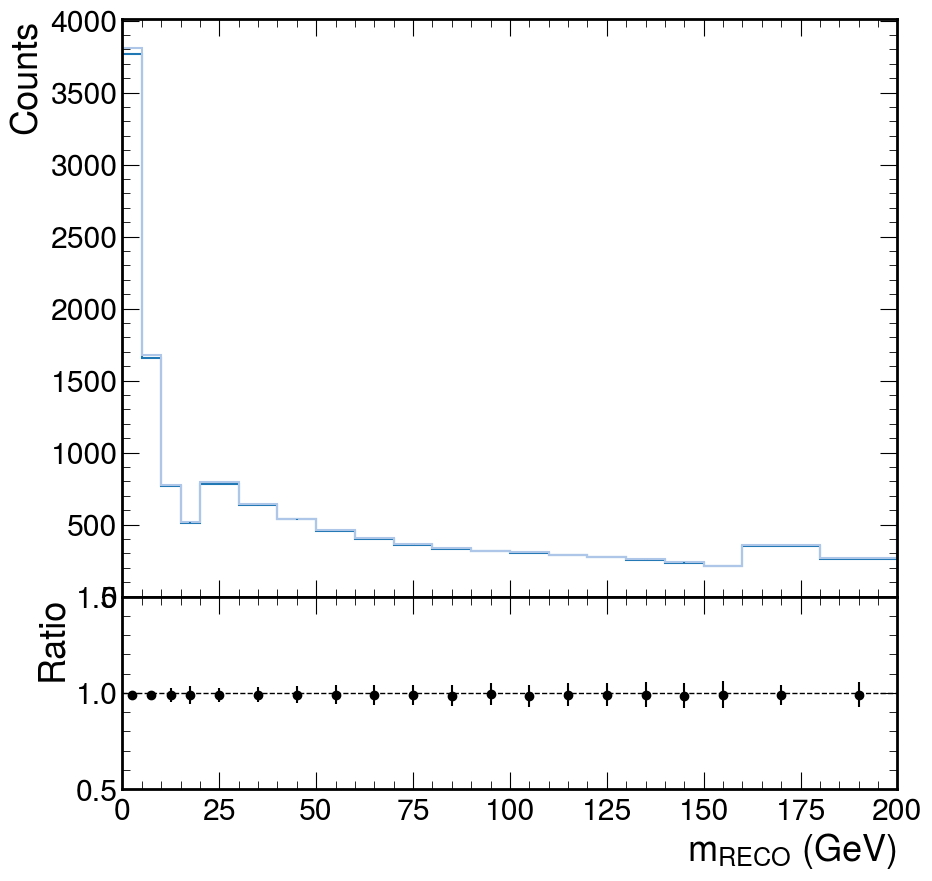

(0.5, 1.5)

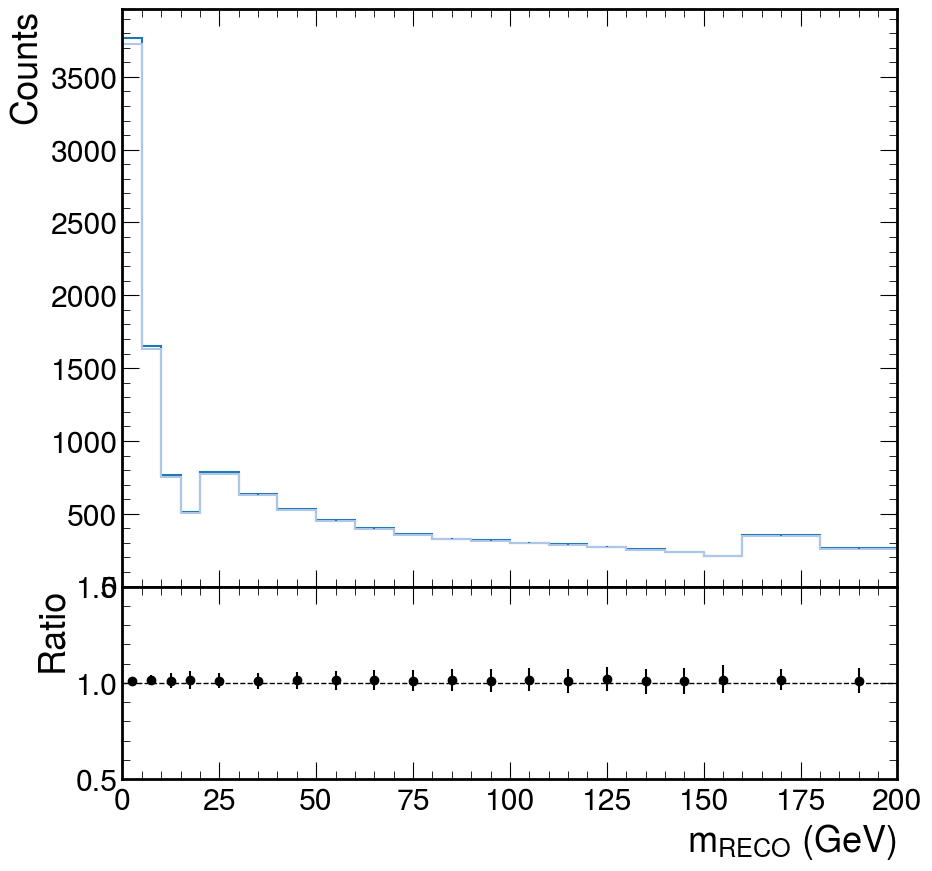

In [43]:
# resp_matrix_4d[ ..., 'nominal'].project('ptreco','mreco')[0,:].plot(label = 'nom')
# resp_matrix_4d[ ..., 'JES_AbsoluteMPFBiasUp'].project('ptreco','mreco')[0,:].plot(label = 'up')
# resp_matrix_4d[ ..., 'JES_AbsoluteMPFBiasDown'].project('ptreco','mreco')[0,:].plot(label = 'down')
# plt.yscale('log')
# plt.legend()
# plt.xlim(0,200)

ax1 = resp_matrix_4d[ ..., 'nominal'].project('ptreco','mreco')[3,:].plot_ratio(resp_matrix_4d[ ..., 'JES_AbsoluteMPFBiasUp'].project('ptreco','mreco')[3,:])
plt.xlim(0,200)
plt.ylim(0.5, 1.5)
plt.show()
ax2 = resp_matrix_4d[ ..., 'nominal'].project('ptreco','mreco')[3,:].plot_ratio(resp_matrix_4d[ ..., 'JES_AbsoluteMPFBiasDown'].project('ptreco','mreco')[3,:])
plt.xlim(0,200)
plt.ylim(0.5, 1.5)

In [44]:
correlation_dic = {
    'JES_AbsoluteMPFBias': 1,
    'JES_AbsoluteScale': 1,
    'JES_AbsoluteStat': 0,
    'JES_FlavorQCD': 1,
    'JES_Fragmentation': 1,
    'JES_PileUpDataMC': 0.5,
    'JES_PileUpPtBB': 0.5,
    'JES_PileUpPtEC1': 0.5,
    'JES_PileUpPtEC2': 0.5,
    'JES_PileUpPtHF': 0.5,
    'JES_PileUpPtRef': 0.5,
    'JES_RelativeFSR': 0.5,
    'JES_RelativeJEREC1': 0,
    'JES_RelativeJEREC2': 0,
    'JES_RelativeJERHF': 0.5,
    'JES_RelativePtBB': 0.5,
    'JES_RelativePtEC1': 0,
    'JES_RelativePtEC2': 0,
    'JES_RelativePtHF': 0.5,
    'JES_RelativeBal': 0.5,
    'JES_RelativeSample': 0,
    'JES_RelativeStatEC': 0,
    'JES_RelativeStatFSR': 0,
    'JES_RelativeStatHF': 0,
    'JES_SinglePionECAL': 1,
    'JES_SinglePionHCAL': 1,
    'JES_TimePtEta': 0
}

jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']

$s_u$
M_2016, M_17, M_18 -> Fed into tunfold

In [45]:
resp_matrix_4d

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  Variable([200, 260, 350, 460, 13000], name='ptgen', label='$p_{T,GEN}$ (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 200, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp', 'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp', 'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 'JERUp', 'JERDown', 'hem', 

In [46]:

# ## Correlatoin = 1, 

# m = 90
# m_16 = 30, +1
# m_17 = 30, -1
# m_18 = 30, +1

# m_var = 90, 91

# m_16, sigma_16 = 1, sigma_17, sigma_18 = 1, 

# sigma_16 + sigma_17 + sigma_18 = 3
# 93

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1774451625.py, line 10)

In [47]:



m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal']
m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal']
m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal']

m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys]
m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys]
m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys]


m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018


rho = 0.2 ## correlation factor

sigma_2016 = m_sys_2016 - m_nom_2016
sigma_2017 = m_sys_2017 - m_nom_2017

sigma_corr = rho*sigma_2016 + rho*sigma_2017
sigma_uncorr_2016 = (1-rho)*sigma_2016
sigma_uncorr_2017 = (1-rho)*sigma_2017

m_corr = m_nom + sigma_corr

m_uncorr_2016 = m_nom + sigma_uncorr_2016

m_uncorr_2017 = m_nom + sigma_uncorr_2017

[m_corr, m_uncorr_2016, m_uncorr_2017] -> TUnfold, for each source



SyntaxError: invalid syntax (1148397828.py, line 30)

In [ ]:
# 'JES_TimePtEta_2016Up' = JES_TimePtEta_2016Up + JES

## IN case of correlation - There should be 1 matrix for the source, summed up beforehand using the correlation formula

## If not correlated - Each source would have individual matrices for 2016, 2017 and 2018


## Finally, all of these can be treated as independent and the uncertainties can be added in quadrature after unfolding

In [ ]:
non_jes_sys_list = ['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown',
                    'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp',
                    'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp',
                    'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 
                    'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']


non_jes_sys_list_up = [sys for sys in non_jes_sys_list if sys[-2:] == 'Up' ]
non_jes_sys_list_down = [sys for sys in non_jes_sys_list if sys[-4:] == 'Down' ]

jes_sys_list_up = [sys for sys in jes_sys_list if sys[-2:] == 'Up' ]
jes_sys_list_down = [sys for sys in jes_sys_list if sys[-4:] == 'Down' ]




In [ ]:
mat_nominal = resp_matrix_4d[{'systematic':'nominal'}]

sys_matrix_dic = {}


## Update with JES first
for sys in jes_sys_list_up:
    m_nom = resp_matrix_4d[ ..., 'nominal'].project('ptgen','mgen','ptreco','mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen','mgen','ptreco','mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen','mgen','ptreco','mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen','mgen','ptreco','mreco').values()

    diff_2016 = m_sys_2016 - m_nom
    diff_2017 = m_sys_2017 - m_nom
    diff_2018 = m_sys_2018 - m_nom

    if sys[-2:] == "Up":
        correlation = correlation_dic[sys[:-2]]
    else:
        correlation = correlation_dic[sys[:-4]]

    

    diff_total = (
                diff_2016**2 + diff_2017**2 + diff_2018**2
                + 2 * correlation * (diff_2016 * diff_2017 + diff_2017 * diff_2018 + diff_2016 * diff_2018)
                )**0.5

    # correlation == 1, diff_total = |diff_2016| + |diff_2017| + |diff_2018|
    # correlation == 0 , diff_total = sqrt(diff_2016**2 + diff_2017**2 + ....)


    
    m_all_year = m_nom + diff_total

    sys_matrix_dic[sys] = m_all_year

    
# Then add all others



for sys in non_jes_sys_list_up:
    sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()

In [ ]:

JES _> 50% correlation

sigma_corr_16 = 0.5*sigma_16
sigma_uncorr_16 = (1-0.5)*sigma_16

.. 17 .. 18

## Matrices

jes_corr = sigma_corr_16 + ..._17,18
sigma_uncorr_16 
sigma_uncorr_17
sigma_uncorr_18

In [ ]:
sys_matrix_dic.keys()

In [ ]:

if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'
output_nominal, matrix_plot = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            systematics = sys_matrix_dic,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            plot = True
                                    )
# sys =   'JES_PileUpDataMCUp'                         
# m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal']
# m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal']
# m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal']

# m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys]
# m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys]|
# m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys]


# m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
# m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
# m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
# output_nominal2 = unfold_using_matrix(input_data, m_var_2018 , fakes, misses,
#                             backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
#                             closure = closure,
#                             groomed = groomed,
#                             is_uf = True,
#                             merge = False,
#                             normalised_xs = True,
#                             do_syst = True,
#                             discard_low_bins = False,
#                             plot = False
#                             )
if groomed:
    matrix_plot.savefig(f_prefix+'groomed_matrix.pdf')
    matrix_plot.savefig(f_prefix+'groomed_matrix.png', dpi = 300)
else:
    matrix_plot.savefig(f_prefix+'ungroomed_matrix.pdf')
    matrix_plot.savefig(f_prefix+'ungroomed_matrix.png', dpi = 300)

In [ ]:
output_w_bg = unfold_using_matrix(input_data, output_pythia['response_matrix_g'][{'systematic':['nominal']}], fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            plot = False
                            )
output_wo_bg = unfold_using_matrix(input_data, output_pythia['response_matrix_g'][{'systematic':['nominal']}], fakes, misses,
                            backgrounds =None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            plot = False
                            )
import matplotlib.gridspec as gridspec
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, sharex=True, )
ax1.stairs((output_w_bg[0]/mgen_width), mgen_edge, label = "With background subtraction" )
ax1.stairs((output_wo_bg[0]/mgen_width), mgen_edge,  )
ax1.stairs((output_wo_bg[0]/mgen_width), mgen_edge,   label = "Without background subtraction")
#plt.plot(mgen_center, output_nominal[0]/mgen_width,label = regularisation  +"\n"+ r"$\tau =$ " + str(tau)[0:6], marker = marker_list[i] , fillstyle = 'none', ls = 'none', color = colors[i])
ax1.set_ylim(0,6000)
ax1.set_xlim(10,140)
ax1.legend(title = r"$p_T$ 200 - 260 GeV")
ax1.set_ylabel("# Events / GeV")
ax2.stairs(output_w_bg[0]/output_wo_bg[0], mgen_edge )
ax2.set_ylim(0.9,1.1)
ax2.set_ylabel("With/Wihout")
ax2.set_xlabel("Groomed Jet Mass (GeV)")


In [ ]:
stat , stat_mat, cov = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':'nominal'}], fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation = 'ScanSURE',
                            plot = False,
                            return_stat = True
                            )



In [ ]:
jk_output_list = []
for i in range(10):
    if not groomed:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_u'][{'jk':i}]
        input_data = output_data['ptjet_mjet_u_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        

    else:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_g'][{'jk':i}]
        input_data = output_data['ptjet_mjet_g_reco']
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        
        
    # resp_matrix_4d_jk = resp_matrix_4d_jk[:,:,:hist.loc(131), : ,:hist.loc(121),:] 
    # resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d_jk[:,:,hist.loc(131), : ,:,:].view()
    # resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d_jk[:,:, :, : ,hist.loc(121),:].view()

    jk_output_list.append(unfold_using_matrix(input_data, resp_matrix_4d_jk, fakes_jk, misses_jk,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            plot = False,
                            ))

In [ ]:
stat_matrix = np.sqrt(10/9)*np.std(jk_output_list, axis = 0)

In [ ]:
for i in range(4):
    plt.stairs(stat[i]/output_nominal[i])
    plt.stairs(stat_matrix[i]/output_nominal[i])
    plt.ylim(0,0.2)
#plt.stairs(stat_mat[2])

In [ ]:
reg_list = ["None", "ScanLcurve", "ScanTau", "ScanSURE"]
marker_list = ['o', '*', '<', '>']
colors = ['red', 'blue', 'green', 'orange']
i = 0
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, sharex=True, )
for regularisation in reg_list:
    
    output_nominal, tau = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':['nominal']}], fakes, misses,
                                backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                                closure = closure,
                                groomed = groomed,
                                is_uf = True,
                                merge = False,
                                normalised_xs = True,
                                do_syst = True,
                                discard_low_bins = False,
                                plot = False,
                                regularisation = regularisation,
                                return_tau = True
                                )
    if regularisation == "None":
        output_nominal_none = output_nominal
    
    if not groomed:
        plt.stairs(output_nominal[3]/mgen_width, mgen_edge,  color = colors[i])

        plt.plot(mgen_center, output_nominal[3]/mgen_width,label = regularisation  +"\n"+ r"$\tau =$ " + str(tau)[0:6], marker = marker_list[i] , fillstyle = 'none', ls = 'none', color = colors[i])
        i = i + 1
        plt.xlim(20,200)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.ylim(0,600)
        
    else:
        
        ax1.stairs(output_nominal[0]/mgen_width, mgen_edge,  color = colors[i])
        ax2.stairs( output_nominal[0]/output_nominal_none[0], mgen_edge,  color = colors[i])
        ax1.plot(mgen_center, output_nominal[0]/mgen_width,label = regularisation  +"\n"+ r"$\tau =$ " + "%.5f" % tau, marker = marker_list[i] , fillstyle = 'none', ls = 'none', color = colors[i])
        i = i + 1
        ax1.set_xlim(10,200)
        
        ax1.legend(title = r"$p_T$ 200 - 260 GeV")
        ax1.set_ylabel("# Events / GeV")
        ax2.set_xlabel("Groomed Jet Mass (GeV)")
        ax1.set_ylim(0,6000)
        ax2.set_ylim(0.8, 1.2)
        ax2.set_ylabel('Reg/Not Reg')
    

In [19]:
non_jes_sys_list = ['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown',
                    'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp',
                    'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp',
                    'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 
                    'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']

jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']

non_jes_sys_list_up = [sys for sys in non_jes_sys_list if sys[-2:] == 'Up' ]
non_jes_sys_list_down = [sys for sys in non_jes_sys_list if sys[-4:] == 'Down' ]

jes_sys_list_up = [sys for sys in jes_sys_list if sys[-2:] == 'Up' ]
jes_sys_list_down = [sys for sys in jes_sys_list if sys[-4:] == 'Down' ]

In [20]:



def find_total_jes( resp_matrix_4d, jes_sys_list, var = "Up", return_outputs = False ):

    eras_mc = ['UL16NanoAODv9', 'UL16NanoAODAPVv9', 'UL17NanoAODv9', 'UL18NanoAODv9']
    jes_matrix_collection = {}
    for sys in jes_sys_list:
        if not groomed:
            key = 'response_matrix_u'
        else:
            key = 'response_matrix_g'
        m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal']
        m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal']
        m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal']
        
        m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys]
        m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys]
        m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys]
    
    
        m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
        m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
        m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
        jes_matrix_collection[sys+'_2016']  = m_var_2016
        jes_matrix_collection[sys+'_2017']  = m_var_2017
        jes_matrix_collection[sys+'_2018']  = m_var_2018
    
        
    
    
    
    jes_output_dic = {} 
    op = widgets.Output()

        # Display the Output widget
    display(op)
    for key in jes_matrix_collection.keys():
        with op:
            op.clear_output()  # Clear the previous output
            print(f"Currently processing: {key}")

        ## Getting the unfolding results for the different variations
        resp_matrix_4d = jes_matrix_collection[key]
        output = unfold_using_matrix(input_data, resp_matrix_4d, fakes, misses,
                                backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                                closure = closure,
                                groomed = groomed,
                                is_uf = True,
                                merge = False,
                                normalised_xs = True,
                                do_syst = True,
                                discard_low_bins = False,
                                plot = False
                                )
        jes_output_dic[key] = output 
    
    
    
    jes_diff_dic = {}


    ## Calculating the difference with nominal
    for key in jes_output_dic:
        diff_list = []
        for i in range(4):
            
            diff = np.abs(jes_output_dic[key][i] - output_nominal[i])
            diff_list.append(diff)
        jes_diff_dic[key] = diff_list
    
    jes_diff_dic.keys()



    ## Adding the uncertainty from three years using the correlation factor
    years = ['2016', '2017', '2018']
    jes_diff_total_dic = {}
    for jes_sys in correlation_dic.keys():
    
        diff_list_2016 = jes_diff_dic[jes_sys + var+ '_2016']
        diff_list_2017 = jes_diff_dic[jes_sys + var+ '_2017']
        diff_list_2018 = jes_diff_dic[jes_sys + var+ '_2018']
        correlation = correlation_dic[jes_sys]
        diff_list = []
        for i in range(4):
            # print(diff_list_2016[i])
            # print(diff_list_2017[i])
            # print(diff_list_2018[i])
            diff_total= np.sqrt( diff_list_2016[i]**2 + diff_list_2017[i]**2 + diff_list_2018[i]**2 + 2*correlation*diff_list_2016[i]*diff_list_2017[i] + 2*correlation*diff_list_2017[i]*diff_list_2018[i] + 2*correlation*diff_list_2016[i]*diff_list_2018[i])
            # print(diff_list)
            diff_list.append(diff_total)
    
        jes_diff_total_dic[jes_sys+var] = diff_list
            
    if var == 'Up':
        jes_total2 =  np.zeros_like(jes_diff_total_dic['JES_AbsoluteMPFBiasUp'])
    if var == 'Down':
        jes_total2 =  np.zeros_like(jes_diff_total_dic['JES_AbsoluteMPFBiasDown'])


    ## finally summing up the contribution from all sources
    for jes_sys in jes_diff_total_dic.keys():
        for i in range(4):
            jes_total2[i] = jes_total2[i] + jes_diff_total_dic[jes_sys][i]**2
    
    jes_total = np.sqrt(jes_total2)
    if return_outputs:
        return jes_output_dic
    
    return jes_total



In [21]:
resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal']

/home/aritra/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Hist(
  StrCategory(['UL16NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  Variable([200, 260, 350, 460, 13000], name='ptgen', label='$p_{T,GEN}$ (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 200, 13000], name='mgen', label='Mass (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=57217.8, variance=5610.49) (WeightedSum(value=67034.9, variance=7336.47) with flow)

In [22]:
jes_dic = find_total_jes( resp_matrix_4d, jes_sys_list_up, var = "Up" , return_outputs = True)

Output()

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape (88,)


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:814: RuntimeWarning: invalid value encountered in divide
  underflow_frac = np.nan_to_num(h_np_underflow/M_np.sum(axis = 0))


NameError: name 'self' is not defined

In [ ]:
jes_total_up = find_total_jes( resp_matrix_4d, jes_sys_list_up, var = "Up" )



In [ ]:
jes_total_down = find_total_jes(resp_matrix_4d, jes_sys_list_down, var = "Down" )

In [23]:
plt.stairs(output_nominal[0])
for key in jes_dic.keys():
    plt.stairs(jes_dic[key][0])
    plt.stairs(jes_dic[key][0])
    plt.stairs(jes_dic[key][0])


NameError: name 'output_nominal' is not defined

In [24]:
for ipt in range(4):
    plt.stairs(jes_total_up[ipt]/np.abs(output_nominal[ipt]), mgen_edge, label = 'Up')
    plt.stairs((-1)*jes_total_down[ipt]/np.abs(output_nominal[ipt]), mgen_edge, label = '-Down')
    plt.xlim(0,200)
    plt.ylim(-0.2,0.2)
    plt.xlabel("Ungroomed Jet Mass (GeV)")
    plt.ylabel("JES Uncertainty Fraction")
    plt.legend()
    plt.show()

NameError: name 'jes_total_up' is not defined

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
stat_total = []
for i in range(4):
    stat_total.append(np.sqrt( stat_matrix[i]**2))

NameError: name 'stat_matrix' is not defined

In [27]:
from unfold_utils.plot_tools import *
save_string_list = ['_1', '_2', '_3', '_4']

        
for ipt in range(4):
    ptbinsGen = [200.00, 260.00, 350.00, 460.00, 13000.00]
    x_data = resp_matrix_4d.axes['mgen'].centers   
    widths = resp_matrix_4d.axes['mgen'].widths

    print(widths)
    
    y_data = resp_matrix_4d.project('ptgen', 'mgen')[ipt, :].values() + misses.project('ptgen', 'mgen').values()[ipt]
    y_data = y_data/y_data.sum()
    
    
    y2_data = output_nominal[ipt]
    sum_i = y2_data.sum()
    y2_data = y2_data/y2_data.sum()
    
    up = jes_total_up[ipt]
    down = jes_total_down[ipt]
    up = up/sum_i
    down = down/sum_i
    
    y_data = y_data/widths
    y2_data = y2_data/widths
    up = up/widths
    down = down/widths



    stat_unc_up = (stat_total[ipt]/widths)/sum_i
    stat_unc_down =  (stat_total[ipt]/widths)/sum_i
    
    

    closure = closure
    plotter = AsymmetricErrorPlot()

    plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=widths, y3_data = None)
    plotter.add_stat_unc(stat_unc_up, stat_unc_down)
    plotter.add_syst_unc(up, down)
    if groomed:
        custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV'
    ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= pt_text)
    #ax1.set_yscale("log")
    #ax1.set_xscale("log")
    widths[-1] = 13000-460
    #         ax1.scatter(x_data, data_2d_gen_values[ipt]/(widths*np.sum(data_2d_gen_values[ipt])), marker = 'o', facecolor = 'g', label = "Data Before unfolding" )
    #         ax1.scatter(x_data, mcreco[ipt]/(widths*np.sum( mcreco[ipt])), marker = 'o', label = "MC Reco" )
    
    
    
    #         handles, labels = ax1.get_legend_handles_labels()
    
    #         handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
    #         handles.append(plt.Line2D([0], [0], color='none', label=pt_text))
    #         labels.append(custom_text)
    #         labels.append(pt_text )
    
    
    
    #         by_label = dict(zip(labels, handles))
    #         ax1.legend(by_label.values(), by_label.keys(), fontsize = 15)
    
    
    
    ax1.set_xlim(0,240)
    
    ax1.set_xlabel("")
    ax2.set_ylim(0,2)
    
    xtick_labels = ax1.get_xticklabels()

    if groomed:
        ax1.set_ylim(-0.003,0.06)
        field = 'groomed_unfolded'
    else:
        field = 'ungroomed_unfolded'
    print(field)
    if closure:
        plt.savefig('plots/zjet/results/' + field +'_closure'+ save_string_list[ipt]  +'.png', dpi = 300)
    else:
        plt.savefig('plots/zjet/results/' + field +save_string_list[ipt] + '.png', dpi = 300)
    #xtick_labels = [str(int(tick)) for tick in xticks]
    
    #xtick_labels[-1] = '∞'
    #ax2.set_xticklabels(xtick_labels)

[1.00e+01 1.00e+01 2.00e+01 2.00e+01 2.00e+01 2.00e+01 2.00e+01 2.00e+01
 2.00e+01 4.00e+01 1.28e+04]


NameError: name 'output_nominal' is not defined

In [28]:
output_dic = {} 

matrix_collection = {}
for sys in non_jes_sys_list:
    if groomed:
        key = 'response_matrix_g'
    else:
        key = 'response_matrix_u'
    m = resp_matrix_4d[ ..., sys]

    matrix_collection[sys] = m


    
for key in matrix_collection.keys():
    
    m = matrix_collection[key]
    output = unfold_using_matrix(input_data, m, fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            plot = False
                            )
    output_dic[key] = output 


### Herwig case
output_herwig = unfold_using_matrix(input_data, resp_matrix_4d_herwig, fakes_herwig, misses_herwig,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            regularisation = "None",
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            plot = False
                            )
output_dic['herwigUp'] = output_herwig 
output_dic['herwigDown'] = output_herwig 

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created
shape (88,)


NameError: name 'self' is not defined

In [ ]:
diff_dic = {}

for key in output_dic:
    diff_list = []
    for i in range(4):
        diff = np.abs(output_dic[key][i] - output_nominal[i])
        if key == "herwigUp":
            print('ta')
            diff = diff/2
        elif key == "herwigDown":
            print('ta2')
            diff = diff/2
        diff_list.append(diff)
    diff_dic[key] = diff_list



total2_up =  np.zeros_like(diff_dic['puUp'])

total2_down =  np.zeros_like(diff_dic['puDown'])


    ## finally summing up the contribution from all sources
non_jes_sys_list_up.append("herwigUp")
non_jes_sys_list_down.append("herwigDown")
for sys in non_jes_sys_list_up:
    for i in range(4):

        total2_up[i] = total2_up[i] + (diff_dic[sys][i])**2

for sys in non_jes_sys_list_down:
    for i in range(4):

        total2_down[i] = total2_down[i] + (diff_dic[sys][i])**2
    
total_up = np.sqrt(total2_up)
total_down = np.sqrt(total2_down)     

In [ ]:
final_total_up = np.sqrt(jes_total_up**2 + total2_up + np.array(stat_total)**2)
final_total_down = np.sqrt(jes_total_down**2 + total2_down + np.array(stat_total)**2)

In [ ]:
data_list = []
for ipt in range(4):
    ptbinsGen = [200.00, 260.00, 350.00, 460.00, 13000.00]
    x_data = resp_matrix_4d.axes['mgen'].centers   
    widths = resp_matrix_4d.axes['mgen'].widths
    print(widths)
    
    y_data = resp_matrix_pythia.project('ptgen', 'mgen')[ipt, :].values() #+ misses.project('ptgen', 'mgen').values()[ipt]
    y_data = y_data/y_data.sum()
    
    
    y2_data = output_nominal[ipt]
    sum_i = y2_data.sum()
    y2_data = y2_data/y2_data.sum()
    
    up = final_total_up[ipt]
    down = final_total_down[ipt]
    up = up/sum_i
    down = down/sum_i
    
    y_data = y_data/widths
    y2_data = y2_data/widths
    up = up/widths
    down = down/widths



    stat_unc_up = (stat_total[ipt]/widths)/sum_i
    stat_unc_down =  (stat_total[ipt]/widths)/sum_i
    
    

    closure = closure
    plotter = AsymmetricErrorPlot()
    plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=widths, y3_data = None)
    plotter.add_stat_unc(stat_unc_up, stat_unc_down)
    plotter.add_syst_unc(up, down)
    if groomed:
        custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV'
    ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= pt_text)
    #ax1.set_yscale("log")
    #ax1.set_xscale("log")
    widths[-1] = 13000-460
    #         ax1.scatter(x_data, data_2d_gen_values[ipt]/(widths*np.sum(data_2d_gen_values[ipt])), marker = 'o', facecolor = 'g', label = "Data Before unfolding" )
    #         ax1.scatter(x_data, mcreco[ipt]/(widths*np.sum( mcreco[ipt])), marker = 'o', label = "MC Reco" )
    
    
    
    #         handles, labels = ax1.get_legend_handles_labels()
    
    #         handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
    #         handles.append(plt.Line2D([0], [0], color='none', label=pt_text))
    #         labels.append(custom_text)
    #         labels.append(pt_text )
    
    
    
    #         by_label = dict(zip(labels, handles))
    #         ax1.legend(by_label.values(), by_label.keys(), fontsize = 15)
    
    
    
    
    if groomed:
        ax1.set_ylim(-0.003,0.020)
        ax1.set_xlim(10,250)
    else:
        ax1.set_ylim(-0.003,0.025)
        ax1.set_xlim(20,250)
    ax1.set_xlabel("")
    ax2.set_ylim(0,2)
    
    xticks = ax2.get_xticks()
    xtick_labels = [str(int(tick)) for tick in xticks]
    xtick_labels[-1] = '∞'
    ax2.set_xticklabels(xtick_labels)
    edges = resp_matrix_4d.axes['mgen'].edges
    data_list.append([edges, y2_data, stat_unc_up, up, down, y_data])


    if groomed:

        field = 'groomed_unfolded'
    else:
        field = 'ungroomed_unfolded'
        
    if closure:
        plt.savefig('plots/zjet/results/' + field +'_closure'+ save_string_list[ipt]  +'.png', bbox_inches='tight', dpi = 300)
    else:
        plt.savefig('plots/zjet/results/' + field +save_string_list[i] + '.png',bbox_inches='tight', dpi = 300)

In [ ]:
#plt.stairs(final_total_up[3]/output_nominal[3])
for i in range(4):
    for diff in ['herwigUp', 'herwigDown']:
        plt.stairs(diff_dic[diff][i]/output_nominal[i])
        plt.stairs(-diff_dic[diff][i]/output_nominal[i])
    plt.ylim(-0.4,0.4)
    plt.show()


In [ ]:
print(output_nominal[3])
print(output_herwig[3])


In [ ]:
cov4 = cov[33:, 33:]
cov23 = cov4[2,3]/np.sqrt(cov[2,2]*cov[3,3])
print(cov23)

cov56 = cov4[5,6]/np.sqrt(cov[5,5]*cov[6,6])
print(cov56)

In [ ]:
stat4 = stat_total[3]
up4 = final_total_up[3]
down4 = final_total_down[3]
herwig4 = diff_dic['herwigUp'][3]

up4 = np.sqrt(up4**2 - herwig4**2)
down4 = np.sqrt(down4**2 - herwig4**2)

In [ ]:
stat_merged23 = np.sqrt(stat4[2]**2 + stat4[3]**2 + 2*cov23*stat4[2]*stat4[3])
stat_merged56 = np.sqrt(stat4[5]**2 + stat4[6]**2 + 2*cov23*stat4[5]*stat4[6])


up_merged23 = np.sqrt(up4[2]**2 + up4[3]**2 + 2*cov23*up4[2]*up4[3])
up_merged56 = np.sqrt(up4[5]**2 + up4[6]**2 + 2*cov23*up4[5]*up4[6])

down_merged23 = np.sqrt(down4[2]**2 + down4[3]**2 + 2*cov23*down4[2]*down4[3])
down_merged56 = np.sqrt(down4[5]**2 + down4[6]**2 + 2*cov23*down4[5]*down4[6])

In [ ]:
stat4_updated = np.delete(stat4, [2,3, 5,6])
stat4_updated = np.insert(stat4_updated, 2, stat_merged23)
stat4_updated = np.insert(stat4_updated, 4, stat_merged56)

up4_updated = np.delete(up4, [2,3, 5,6])
up4_updated = np.insert(up4_updated, 2, up_merged23)
up4_updated = np.insert(up4_updated, 4, up_merged56)

down4_updated = np.delete(down4, [2,3, 5,6])
down4_updated = np.insert(down4_updated, 2, down_merged23)
down4_updated = np.insert(down4_updated, 4, down_merged56)

In [ ]:
plt.stairs(  output_nominal[3][2:]/mgen_width[2:],mgen_edge[2:],label = "Unfolded using Pythia")
plt.stairs(  output_herwig[3][2:]/mgen_width[2:],mgen_edge[2:],label = "Unfolded using Herwig", color = 'r')
plt.xlabel("Ungroomed Jet Mass")
plt.legend()
plt.xlim(0,200)

In [ ]:
output_nominal_4 = np.array([  83.07801077 ,-100.52688885,  567.69271859+ 4345.50207149 ,4196.01275519,
 2250.2754397 + 1832.24107889, 1158.49218031 , 845.1797427,  1045.38296229,
  495.86111474])

output_herwig_4 = np.array([  23.30007551  , 16.31759685 ,1207.67597374+ 3223.0421201 , 4775.10927944,
 1251.71174597 +2445.01997641 ,1120.96205824  ,788.94899769, 1010.03533031,
  522.25986855])

In [ ]:
diff_herwig = np.abs(output_herwig_4 - output_nominal_4)/2
up4_updated = np.sqrt(up4_updated**2 + diff_herwig**2   ) 
down4_updated = np.sqrt(down4_updated**2 + diff_herwig**2   ) 

In [ ]:
print(widths)

In [ ]:
mgen_edge

In [ ]:
output_nominal_4

In [ ]:
plt.imshow(cov4)
plt.xlabel("Mass bin number")
plt.ylabel("Mass bin number")

In [ ]:
resp_matrix_4d.axes['mgen'].edges

In [ ]:

ipt = 3
ptbinsGen = [200.00, 260.00, 350.00, 460.00, 13000.00]
x_data = [5.0e+00, 1.5e+01, 40,  7.0e+01, 100,
       1.3e+02, 1.5e+02, 1.8e+02, 225]
#widths = resp_matrix_4d.axes['mgen'].widths
widths = [10,10,40,20,40,20,20, 40, 12540]
y_data = resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen')[ipt, :].values() #+ misses.project('ptgen', 'mgen').values()[ipt]
y_data23 = y_data[2]+y_data[3]
y_data56 = y_data[5]+y_data[6]

y_data = np.delete(y_data, [2,3,5,6])
y_data = np.insert(y_data, 2, y_data23)
y_data = np.insert(y_data, 4, y_data56)

y_data = y_data/y_data.sum()


y2_data = output_nominal_4
sum_i = y2_data.sum()
y2_data = y2_data/y2_data.sum()

up = up4_updated
down = down4_updated

up = up/sum_i
down = down/sum_i

y_data = y_data/widths
y2_data = y2_data/widths
up = up/widths
down = down/widths



stat_unc_up = (stat4_updated/widths)/sum_i
stat_unc_down =  (stat4_updated/widths)/sum_i


widths[-1] = 50
closure = closure
plotter = AsymmetricErrorPlot()
plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=widths, y3_data = None)
plotter.add_stat_unc(stat_unc_up, stat_unc_down)
plotter.add_syst_unc(up, down)
if groomed:
    custom_text = 'Groomed'
    xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
    ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV'
ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= pt_text)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
widths[-1] = 13000-460
#         ax1.scatter(x_data, data_2d_gen_values[ipt]/(widths*np.sum(data_2d_gen_values[ipt])), marker = 'o', facecolor = 'g', label = "Data Before unfolding" )
#         ax1.scatter(x_data, mcreco[ipt]/(widths*np.sum( mcreco[ipt])), marker = 'o', label = "MC Reco" )



#         handles, labels = ax1.get_legend_handles_labels()

#         handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
#         handles.append(plt.Line2D([0], [0], color='none', label=pt_text))
#         labels.append(custom_text)
#         labels.append(pt_text )



#         by_label = dict(zip(labels, handles))
#         ax1.legend(by_label.values(), by_label.keys(), fontsize = 15)




if groomed:
    ax1.set_ylim(-0.003,0.025)
    ax1.set_xlim(10,250)
else:
    ax1.set_ylim(-0.003,0.015)
    ax1.set_xlim(20,250)
ax1.set_xlabel("")
ax2.set_ylim(0,2)

xticks = ax2.get_xticks()
xtick_labels = [str(int(tick)) for tick in xticks]
xtick_labels[-1] = '∞'
ax2.set_xticklabels(xtick_labels)
edges = [0.0e+00, 1.0e+01, 2.0e+01,  6.0e+01, 8.0e+01, 
       1.2e+02, 1.4e+02, 1.6e+02, 2.0e+02, 1.3e+04]
data_list.append([edges, y2_data, stat_unc_up, up, down, y_data])

In [ ]:
#plt.stairs(final_total_up[3]/output_nominal[3])
for i in range(4):
    plt.stairs(total_up[i]/output_nominal[i])
    plt.stairs(-total_down[i]/output_nominal[i])
    plt.ylim(-0.5,0.5)
    plt.show()

In [ ]:
if not groomed:
    del(data_list[3])

In [ ]:
markers = ['o', 's', 'D', '^', 'v']
ipt = 0 
for i in range(4):
    x_data = resp_matrix_4d.axes['mgen'].centers  
    widths = resp_matrix_4d.axes['mgen'].widths
    if not groomed:
        if i == 3:
            x_data = [5.0e+00, 1.5e+01, 40,  7.0e+01, 100,
       1.3e+02, 1.5e+02, 1.8e+02, 225]
#widths = resp_matrix_4d.axes['mgen'].widths
            widths = [10,10,40,20,40,20,20, 40, 12540]
        
    
    power_text = r'$\times 10^{{{}}}$'.format(i)
    pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV ' + power_text
    ipt = ipt + 1
    if i==0:
        plt.stairs(np.array(data_list[i][1][:-4])*(10**i), data_list[i][0][:-4], color = 'black' )
        plt.plot(x_data[:-4], np.array(data_list[i][1][:-4])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    elif i==1:
        plt.stairs(np.array(data_list[i][1][:-3])*(10**i), data_list[i][0][:-3], color = 'black' )
        plt.plot(x_data[:-3], np.array(data_list[i][1][:-3])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
        
    else:    
        plt.stairs(np.array(data_list[i][1])*(10**i), data_list[i][0], color = 'black' )   
            
        plt.plot(x_data, np.array(data_list[i][1])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    plt.xlim(0,100)
    plt.yscale('log')
    plt.ylim(10**-5, 60)
    plt.xlim(20, 200)
    plt.ylim()
    widths[-1] = 20
    if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        #custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlabel(xlabel)
    plt.ylabel( ylabel)
    
    sys_up = np.array(data_list[i][3])*10**i 
    sys_down = np.array(data_list[i][4])*10**i 
    tot_up = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)
    tot_down = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)

    if i ==0:
        plt.bar(x_data[:-4], # x
            2*np.array(data_list[i][2][:-4])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - (np.array(data_list[i][2][:-4])*(10**i)), color='b',  width=widths[:-4], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-4])*10**i)
        plt.bar(x_data[:-4], # x
            tot_up[:-4] + tot_down[:-4], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - tot_down[:-4], color = 'cyan', width=widths[:-4], label='Total Unc')
    elif i ==1:
        idx = 3
        plt.bar(x_data[:-idx], # x
            2*np.array(data_list[i][2][:-idx])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - (np.array(data_list[i][2][:-idx])*(10**i)), color='b',  width=widths[:-idx], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-idx])*10**i)
        plt.bar(x_data[:-idx], # x
            tot_up[:-idx] + tot_down[:-idx], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - tot_down[:-idx], color = 'cyan', width=widths[:-idx], label='Total Unc')
    else:
        plt.bar(x_data, # x
            2*np.array(data_list[i][2])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - (np.array(data_list[i][2])*(10**i)), color='b',  width=widths, label='Stat. Unc.')
        print(np.array(data_list[i][2])*10**i)
        plt.bar(x_data, # x
            tot_up + tot_down, # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - tot_down, color = 'cyan', width=widths, label='Total Unc')
for i in range(4):  
    if i == 0:
        idx = 4
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    elif i == 1:
        idx = 3
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    else:

        plt.stairs(np.array(data_list[i][5][:])*(10**i), data_list[i][0][:], color = 'red', label = ' PYTHIA', lw = 2  )
handles, labels = plt.gca().get_legend_handles_labels()
        
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
labels.append(custom_text)

# Add legend with the custom entry
hep.cms.label("Preliminary", data = 1)
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(), fontsize = 12)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 0
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", "herwigUp"]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][2]/np.abs(output_nominal[2]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((final_total_up[2]/np.abs(output_nominal[2]))[2:], mgen_edge[2:], label = "Total", color = 'k', lw = 2)
plt.stairs((stat_total[2]/np.abs(output_nominal[2]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-3, 1)

if groomed:
        #custom_text = 'Groomed'
    xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    plt.xlim(10,200)
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlim(20,200)
plt.xlabel(xlabel)
plt.ylabel("Uncertainty Fraction")
hep.cms.label("Preliminary", data = True)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 2
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", "herwigUp"]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((final_total_up[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Total", color = 'k', lw = 2)
plt.stairs((stat_total[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-3, 1)
plt.xlim(20,120)
if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
plt.xlabel(xlabel)
plt.ylabel("Uncertainty Fraction")
hep.cms.label("Preliminary", data = True)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 3
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", "herwigUp"]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((final_total_up[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Total", color = 'k', lw = 2)
plt.stairs((stat_total[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-3, 1)
plt.xlim(20,120)
if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
plt.xlabel(xlabel)
plt.ylabel("Uncertainty Fraction")
hep.cms.label("Preliminary", data = True)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 1
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", "herwigUp"]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((final_total_up[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Total", color = 'k', lw = 2)
plt.stairs((stat_total[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-3, 1)
plt.xlim(20,140)
if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
plt.xlabel(xlabel)
plt.ylabel("Uncertainty Fraction")
hep.cms.label("Preliminary", data = True)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 3
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", "herwigUp"]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((final_total_up[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Total", color = 'k', lw = 2)
plt.stairs((stat_total[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-3, 1)
plt.xlim(20,200)
if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
plt.xlabel(xlabel)
hep.cms.label("Preliminary", data = True)

In [ ]:
diff_dic['JESUp'] = jes_total_up
diff_dic['JESDown'] = jes_total_down
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
i_pt = 3
for diff in diff_dic.keys():
    if diff in ["JMSUp", "JMRUp", "JESUp", "JERUp", ]:
    #if diff[-2:] == "Up":
        plt.stairs((diff_dic[diff][i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = diff[:-2], lw = 2)
plt.stairs((diff_herwig/np.abs(output_nominal_4))[2:], edges[2:], label = "Herwig",  lw = 2)
plt.stairs((up4_updated/np.abs(output_nominal_4))[2:], edges[2:], label = "Total", color = 'k', lw = 2)

plt.stairs((stat_total[i_pt]/np.abs(output_nominal[i_pt]))[2:], mgen_edge[2:], label = "Stat Unc.", color = 'grey', lw = 2, ls = '--')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', title = title_list[i_pt])
plt.yscale('log')
plt.ylim(10**-5, 1)
plt.xlim(20,200)
if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    #custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    #ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
plt.xlabel(xlabel)
plt.ylabel("Uncertainty Fraction")
hep.cms.label("Preliminary", data = True)